<a href="https://colab.research.google.com/github/Sparshj8287/ML_Journey/blob/main/03_Introduction_to_computer_vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Get the data

In [ ]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Unzip the downloaded fileal
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-09-13 05:13:54--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.118.128, 142.251.10.128, 142.251.12.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.118.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  54.9MB/s    in 1.9s    

2022-09-13 05:13:56 (54.9 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [ ]:
!ls pizza_steak/train/pizza


1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [ ]:
num_steak_images_train=len(os.listdir("pizza_steak/train/pizza"))
num_steak_images_train


750

In [ ]:
#Get the classes drammatically
import pathlib
import numpy as np
data_dir=pathlib.Path("pizza_steak/train")
data_dir

PosixPath('pizza_steak/train')

In [ ]:
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [ ]:
#Let visualise our images 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
def view_random_image(target_dir,target_class):
  target_folder=target_dir+target_class
  random_image=random.sample(os.listdir(target_folder),1)
  print(random_image)
  img=mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");#Default axis is on 
  return img


['77677.jpg']


(512, 384, 3)

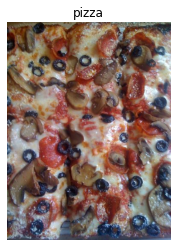

In [ ]:
img=view_random_image("pizza_steak/train/","pizza")
img.shape

In [ ]:
img

array([[[ 65,  44,  15],
        [ 67,  46,  17],
        [ 68,  47,  20],
        ...,
        [131, 148, 130],
        [127, 144, 128],
        [124, 141, 125]],

       [[ 66,  45,  14],
        [ 67,  46,  15],
        [ 68,  47,  18],
        ...,
        [127, 141, 126],
        [123, 140, 124],
        [120, 137, 121]],

       [[ 67,  47,  12],
        [ 68,  48,  15],
        [ 69,  49,  16],
        ...,
        [ 93, 107,  94],
        [ 93, 107,  94],
        [ 91, 105,  92]],

       ...,

       [[ 78,  81,  88],
        [ 66,  70,  79],
        [ 63,  70,  80],
        ...,
        [107, 129, 166],
        [106, 130, 168],
        [107, 131, 169]],

       [[ 56,  60,  69],
        [ 49,  56,  64],
        [ 53,  60,  70],
        ...,
        [115, 143, 180],
        [115, 143, 182],
        [116, 144, 183]],

       [[ 57,  61,  70],
        [ 55,  62,  70],
        [ 64,  71,  81],
        ...,
        [123, 153, 191],
        [125, 155, 193],
        [126, 155, 195]]

In [ ]:
img.dtype



dtype('uint8')

In [ ]:
img[0].shape


(384, 3)

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 384, 3), dtype=uint8, numpy=
array([[[ 65,  44,  15],
        [ 67,  46,  17],
        [ 68,  47,  20],
        ...,
        [131, 148, 130],
        [127, 144, 128],
        [124, 141, 125]],

       [[ 66,  45,  14],
        [ 67,  46,  15],
        [ 68,  47,  18],
        ...,
        [127, 141, 126],
        [123, 140, 124],
        [120, 137, 121]],

       [[ 67,  47,  12],
        [ 68,  48,  15],
        [ 69,  49,  16],
        ...,
        [ 93, 107,  94],
        [ 93, 107,  94],
        [ 91, 105,  92]],

       ...,

       [[ 78,  81,  88],
        [ 66,  70,  79],
        [ 63,  70,  80],
        ...,
        [107, 129, 166],
        [106, 130, 168],
        [107, 131, 169]],

       [[ 56,  60,  69],
        [ 49,  56,  64],
        [ 53,  60,  70],
        ...,
        [115, 143, 180],
        [115, 143, 182],
        [116, 144, 183]],

       [[ 57,  61,  70],
        [ 55,  62,  70],
        [ 64,  71,  81],
        ...,
        [123, 153, 19

In [ ]:
img.shape#This will gives width,height,colour channels

(512, 384, 3)

##So we preprocess our data and we normalize our data and get our data ready to cook

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])
# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 26s 228ms/step - loss: 0.5507 - accuracy: 0.7213 - val_loss: 0.3795 - val_accuracy: 0.8320
Epoch 2/5
47/47 [==============================] - 9s 194ms/step - loss: 0.4077 - accuracy: 0.8160 - val_loss: 0.3422 - val_accuracy: 0.8440
Epoch 3/5
47/47 [==============================] - 9s 194ms/step - loss: 0.3785 - accuracy: 0.8340 - val_loss: 0.3002 - val_accuracy: 0.8840
Epoch 4/5
47/47 [==============================] - 9s 194ms/step - loss: 0.3543 - accuracy: 0.8440 - val_loss: 0.3012 - val_accuracy: 0.8840
Epoch 5/5
47/47 [==============================] - 9s 195ms/step - loss: 0.3148 - accuracy: 0.8647 - val_loss: 0.3561 - val_accuracy: 0.8460


In [ ]:
model_2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
history_2=model_2.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data
                      )


Epoch 1/5
47/47 [==============================] - 9s 183ms/step - loss: 1.5216 - accuracy: 0.4893 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 179ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 14s 293ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 178ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 178ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
#let get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [ ]:
224*224*3

150528

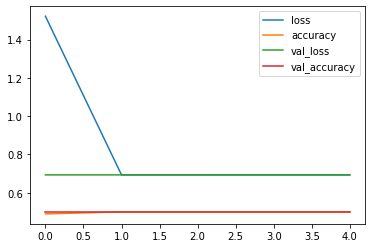

In [ ]:
import pandas as pd
pd.DataFrame(history_2.history).plot()



In [ ]:
#Let create another model
model_3=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
history_3=model_3.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data)


Epoch 1/5
47/47 [==============================] - 9s 184ms/step - loss: 3.2517 - accuracy: 0.6540 - val_loss: 0.8598 - val_accuracy: 0.6540
Epoch 2/5
47/47 [==============================] - 8s 180ms/step - loss: 0.7276 - accuracy: 0.7007 - val_loss: 0.8051 - val_accuracy: 0.6780
Epoch 3/5
47/47 [==============================] - 10s 214ms/step - loss: 0.9271 - accuracy: 0.6773 - val_loss: 1.2866 - val_accuracy: 0.5740
Epoch 4/5
47/47 [==============================] - 8s 180ms/step - loss: 0.6791 - accuracy: 0.7233 - val_loss: 0.5028 - val_accuracy: 0.7640
Epoch 5/5
47/47 [==============================] - 8s 178ms/step - loss: 0.5643 - accuracy: 0.7367 - val_loss: 0.6187 - val_accuracy: 0.7480


In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

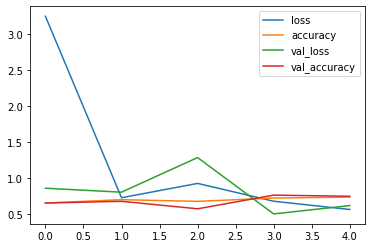

In [ ]:
pd.DataFrame(history_3.history).plot()

['3787809.jpg']
['203831.jpg']


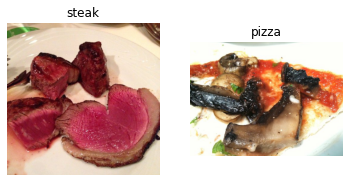

In [ ]:
#Becoming one with data
plt.figure()
plt.subplot(1,2,1)
steak=view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza=view_random_image("pizza_steak/train/","pizza")

In [ ]:
!nvidia-smi

Tue Sep 13 05:16:52 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P0    28W /  70W |   2348MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
a,b =train_data.next()

In [ ]:
b.shape


(32,)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

In [ ]:
train_data=train_datagen.flow_from_directory(directory="pizza_steak/train/",
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32,
                                             seed=42)
test_data=test_datagen.flow_from_directory(directory='pizza_steak/test/',
                                           target_size=(224,224),
                                           class_mode="binary",
                                           batch_size=32,
                                           seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images,labels = train_data.next()

In [ ]:
images,labels

In [ ]:
#let create the model 
#First import some librares
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten, Conv2D,MaxPool2D,Activation
from tensorflow.keras import Sequential

In [ ]:
model_4=Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(1,activation="sigmoid")

])

In [ ]:
#Let compile the model
model_4.compile(loss="binary_crossentropy",
              optimizer=Adam(),
              metrics=["accuracy"])

In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Let fit the model
history_4=model_4.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 203ms/step - loss: 0.7250 - accuracy: 0.6667 - val_loss: 0.4838 - val_accuracy: 0.7840
Epoch 2/5
47/47 [==============================] - 9s 194ms/step - loss: 0.4354 - accuracy: 0.8147 - val_loss: 0.4504 - val_accuracy: 0.8000
Epoch 3/5
47/47 [==============================] - 9s 192ms/step - loss: 0.2567 - accuracy: 0.9093 - val_loss: 0.5042 - val_accuracy: 0.7640
Epoch 4/5
47/47 [==============================] - 9s 194ms/step - loss: 0.0985 - accuracy: 0.9727 - val_loss: 0.6221 - val_accuracy: 0.7880
Epoch 5/5
47/47 [==============================] - 9s 193ms/step - loss: 0.0522 - accuracy: 0.9847 - val_loss: 0.8017 - val_accuracy: 0.7560


In [ ]:
model_4.evaluate(test_data)

16/16 [==============================] - 2s 135ms/step - loss: 0.8017 - accuracy: 0.7560


[0.801707923412323, 0.7559999823570251]

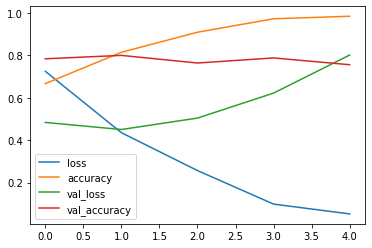

In [ ]:
pd.DataFrame(history_4.history).plot()

In [ ]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

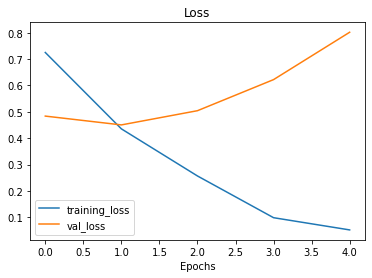

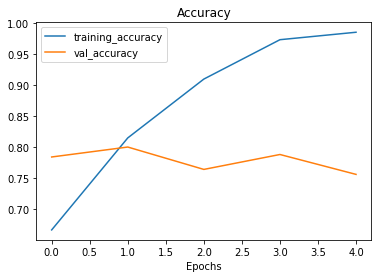

In [ ]:
plot_loss_curves(history_4)

In [ ]:
#Hello it day 5 so let create model 5 with improve our baseline
model_5=Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

In [ ]:
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
history_5=model_5.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 191ms/step - loss: 0.5864 - accuracy: 0.6687 - val_loss: 0.4100 - val_accuracy: 0.8340
Epoch 2/5
47/47 [==============================] - 9s 183ms/step - loss: 0.4262 - accuracy: 0.8040 - val_loss: 0.3957 - val_accuracy: 0.8040
Epoch 3/5
47/47 [==============================] - 9s 183ms/step - loss: 0.4052 - accuracy: 0.8227 - val_loss: 0.3194 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 9s 183ms/step - loss: 0.3786 - accuracy: 0.8340 - val_loss: 0.3473 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 9s 184ms/step - loss: 0.3771 - accuracy: 0.8373 - val_loss: 0.3026 - val_accuracy: 0.8900


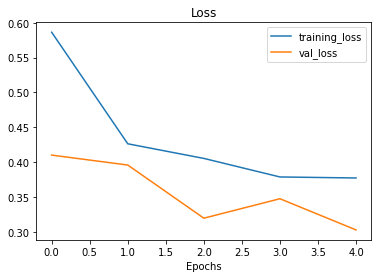

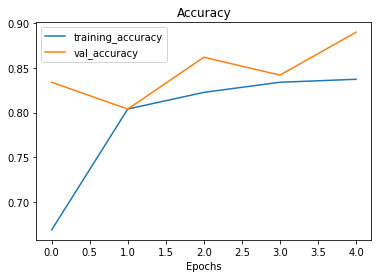

In [ ]:
plot_loss_curves(history_5)

In [ ]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
print("Augmented Training Data")
train_data_augmented=train_datagen_augmented.flow_from_directory(train_dir,
                                                                 target_size=(224,224),
                                                                 batch_size=32,
                                                                 class_mode="binary",
                                                                 shuffle=True
                                                                 )
print("Non-Augmented training data")
#created non-augmented data
train_data=train_datagen.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="binary",
                                             shuffle=False)
print("Non-augmented test data")
test_data=test_datagen.flow_from_directory(test_dir,
                                           target_size=(224,224),
                                           batch_size=32,
                                           class_mode="binary",
                                           shuffle=True)

Augmented Training Data
Found 1500 images belonging to 2 classes.
Non-Augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented test data
Found 500 images belonging to 2 classes.


In [ ]:
#Get visualise the augmented data
augmented_images,augmented_labels=train_data_augmented.next()
images,labels=train_data.next()

In [ ]:
augmented_images.shape



(32, 224, 224, 3)

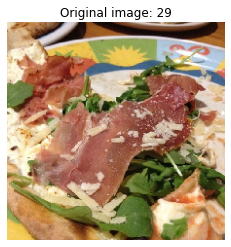

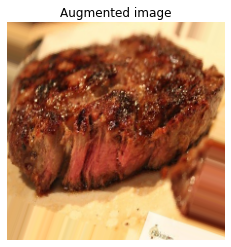

In [ ]:
import random
random_number=random.randint(1,32)
plt.imshow(images[random_number])
plt.title(f"Original image: {random_number}")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)
plt.show()

In [ ]:
#Let create model 6
model_6=Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid')
])

In [ ]:
#Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
#Let fit the model
history_6=model_6.fit(train_data_augmented,
                      epochs=5,
                      steps_per_epoch=len(train_data_augmented),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 470ms/step - loss: 0.6841 - accuracy: 0.5340 - val_loss: 0.6190 - val_accuracy: 0.6520
Epoch 2/5
47/47 [==============================] - 23s 484ms/step - loss: 0.5964 - accuracy: 0.6807 - val_loss: 0.4252 - val_accuracy: 0.8120
Epoch 3/5
47/47 [==============================] - 22s 476ms/step - loss: 0.5368 - accuracy: 0.7380 - val_loss: 0.4630 - val_accuracy: 0.7980
Epoch 4/5
47/47 [==============================] - 22s 462ms/step - loss: 0.5070 - accuracy: 0.7587 - val_loss: 0.3652 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 22s 463ms/step - loss: 0.4828 - accuracy: 0.7807 - val_loss: 0.3566 - val_accuracy: 0.8580


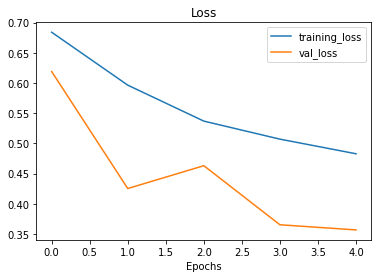

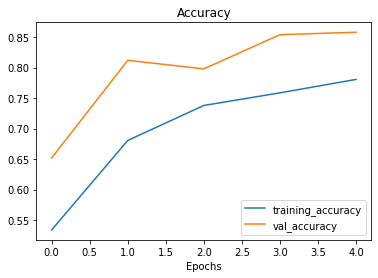

In [ ]:
plot_loss_curves(history_6)

In [ ]:
#Let create model 7
model_7=Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid')
])

In [ ]:
#Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
#Let fit the model
history_7=model_7.fit(train_data_augmented,
                      epochs=5,
                      steps_per_epoch=len(train_data_augmented),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 466ms/step - loss: 0.6579 - accuracy: 0.5933 - val_loss: 0.5618 - val_accuracy: 0.7100
Epoch 2/5
47/47 [==============================] - 21s 456ms/step - loss: 0.5681 - accuracy: 0.6893 - val_loss: 0.4589 - val_accuracy: 0.7960
Epoch 3/5
47/47 [==============================] - 22s 459ms/step - loss: 0.5154 - accuracy: 0.7573 - val_loss: 0.3970 - val_accuracy: 0.8120
Epoch 4/5
47/47 [==============================] - 22s 477ms/step - loss: 0.4977 - accuracy: 0.7633 - val_loss: 0.3851 - val_accuracy: 0.8320
Epoch 5/5
47/47 [==============================] - 21s 456ms/step - loss: 0.4927 - accuracy: 0.7700 - val_loss: 0.4197 - val_accuracy: 0.7960


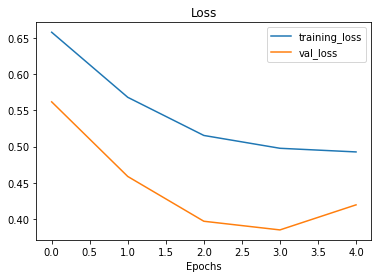

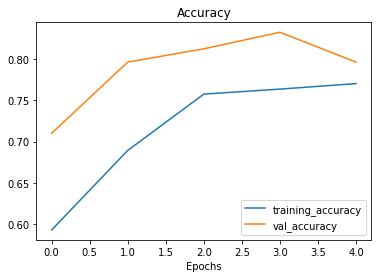

In [ ]:
plot_loss_curves(history_7)

Text(0.5, 1.0, 'Steak')

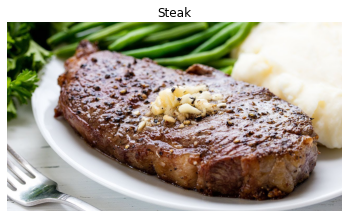

In [ ]:
steak=mpimg.imread("steak_image.jpeg")
plt.imshow(steak)
plt.axis(False)
plt.title("Steak")

In [ ]:
expanded_steak=tf.expand_dims(steak,axis=0)

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  img=tf.expand_dims(img,axis=0)
  return img

In [ ]:
steak = load_and_prep_image("steak_image.jpeg")
steak

<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.06738696, 0.16542616, 0.00772309],
         [0.08930572, 0.19966987, 0.00689276],
         [0.12581033, 0.28533417, 0.01791718],
         ...,
         [0.96904767, 0.9607843 , 0.9019608 ],
         [0.96904767, 0.9603641 , 0.9098039 ],
         [0.96904767, 0.9603641 , 0.9137255 ]],

        [[0.09803922, 0.20081031, 0.01280512],
         [0.08973589, 0.19864945, 0.        ],
         [0.14621848, 0.3044818 , 0.0022509 ],
         ...,
         [0.98039216, 0.95686275, 0.9098039 ],
         [0.98039216, 0.95686275, 0.9098039 ],
         [0.98039216, 0.9529412 , 0.9137255 ]],

        [[0.11031412, 0.20835334, 0.        ],
         [0.0984894 , 0.20493197, 0.00195078],
         [0.17972189, 0.34355745, 0.00630252],
         ...,
         [0.98039216, 0.95686275, 0.9098039 ],
         [0.98039216, 0.9529412 , 0.9137255 ],
         [0.98039216, 0.9529412 , 0.91792715]],

        ...,

        [[0.91932815, 0.93109286, 

In [ ]:
steak.shape

TensorShape([1, 224, 224, 3])

In [ ]:
pred=model_7.predict(steak)
pred

array([[0.24970524]], dtype=float32)

In [ ]:
import zipfile

# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
import os 
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.")

In [ ]:
train_dir="10_food_classes_all_data/train/"
test_dir="10_food_classes_all_data/test/"

In [ ]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)

class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)


[]


In [ ]:
import pathlib
import numpy as np
data_dir=pathlib.Path(train_dir)
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

[]


In [ ]:
#Let visualise our images 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
def view_random_image(target_dir,target_class):
  target_folder=target_dir+target_class
  random_image=random.sample(os.listdir(target_folder),1)
  print(random_image)
  img=mpimg.imread(target_folder+"/"+random_image[0])
  img_shape=img.shape
  print(img_shape)
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");#Default axis is on 
  return img

['2492287.jpg']
(512, 512, 3)


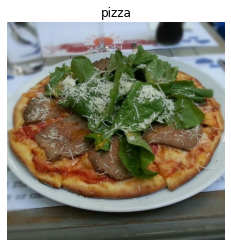

In [ ]:
import random
img=view_random_image(train_dir,random.choice(class_names))

In [ ]:
#Preprocess the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

In [ ]:
train_data=train_datagen.flow_from_directory(train_dir,
                                            target_size=(224,224),
                                            batch_size=32
                                            )
test_data=test_datagen.flow_from_directory(test_dir,
                                           target_size=(224,224),
                                           batch_size=32)

FileNotFoundError: ignored

In [ ]:
data_dir

PosixPath('10_food_classes_all_data/train')

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense
model_8=Sequential([
    Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation='softmax')
])

In [ ]:
# Compile the model
model_8.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
#Fit the model
history_8=model_8.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 404s 2s/step - loss: 2.1814 - accuracy: 0.1848 - val_loss: 2.0344 - val_accuracy: 0.2788
Epoch 2/5
235/235 [==============================] - 397s 2s/step - loss: 1.9036 - accuracy: 0.3337 - val_loss: 1.9814 - val_accuracy: 0.2968
Epoch 3/5
235/235 [==============================] - 395s 2s/step - loss: 1.4931 - accuracy: 0.4940 - val_loss: 1.9841 - val_accuracy: 0.3316
Epoch 4/5
235/235 [==============================] - 404s 2s/step - loss: 0.9224 - accuracy: 0.6911 - val_loss: 2.4734 - val_accuracy: 0.3040
Epoch 5/5
235/235 [==============================] - 403s 2s/step - loss: 0.3939 - accuracy: 0.8765 - val_loss: 3.4767 - val_accuracy: 0.2816


In [ ]:
model_8.evaluate(test_data)

In [ ]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

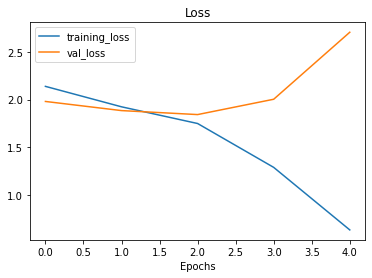

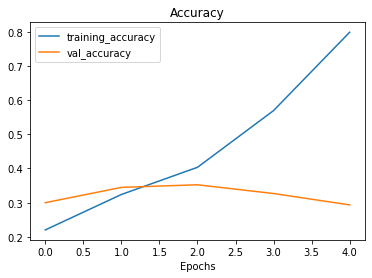

In [ ]:
plot_loss_curves(history_8)

In [ ]:
model_9=Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="softmax")
])
model_9.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
history_9=model_9.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

NameError: ignored

In [ ]:
model_9.summary() 

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 29160)             0         
                                                                 
 dense_3 (Dense)             (None, 10)               

In [ ]:
model_8.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

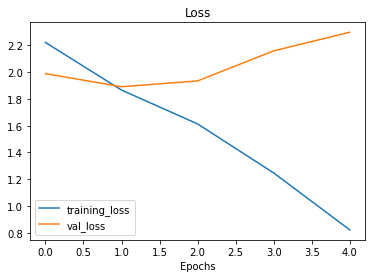

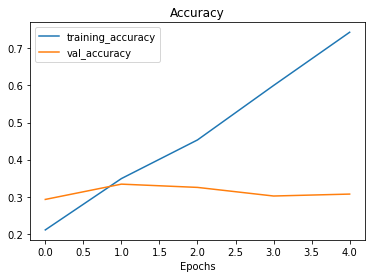

In [ ]:
plot_loss_curves(history_9)

In [ ]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [ ]:
model_10=tf.keras.models.clone_model(model_8)
model_10.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])
history_10=model_10.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 116s 493ms/step - loss: 2.1615 - accuracy: 0.2108 - val_loss: 1.9592 - val_accuracy: 0.3084
Epoch 2/5
235/235 [==============================] - 113s 479ms/step - loss: 2.0354 - accuracy: 0.2837 - val_loss: 1.8588 - val_accuracy: 0.3684
Epoch 3/5
235/235 [==============================] - 112s 476ms/step - loss: 1.9795 - accuracy: 0.3115 - val_loss: 1.8343 - val_accuracy: 0.3704
Epoch 4/5
235/235 [==============================] - 113s 479ms/step - loss: 1.9346 - accuracy: 0.3385 - val_loss: 1.7734 - val_accuracy: 0.4056
Epoch 5/5
235/235 [==============================] - 112s 478ms/step - loss: 1.9029 - accuracy: 0.3393 - val_loss: 1.7253 - val_accuracy: 0.4044


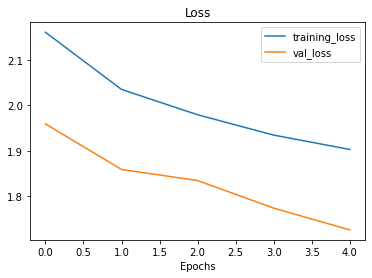

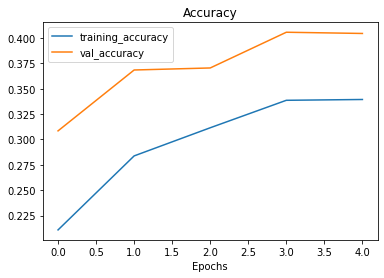

In [ ]:
plot_loss_curves(history_10)

In [ ]:

# -q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

In [ ]:
# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
  
  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

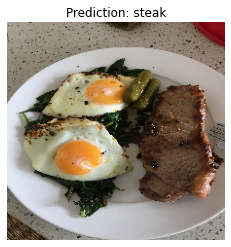

In [ ]:
pred_and_plot(model_10, "03-steak.jpeg", class_names)

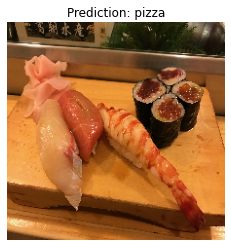

In [ ]:
pred_and_plot(model_10, "03-sushi.jpeg", class_names)

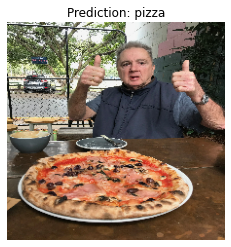

In [ ]:
pred_and_plot(model_10, "03-pizza-dad.jpeg", class_names)

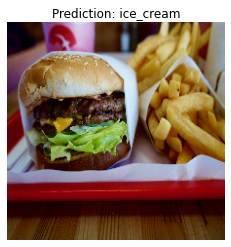

In [ ]:
pred_and_plot(model_10, "03-hamburger.jpeg", class_names)

In [ ]:
# Save a model
model_10.save("saved_trained_model")

In [ ]:
# Load in a model and evaluate it
loaded_model_10 = tf.keras.models.load_model("saved_trained_model")
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 11s 138ms/step - loss: 1.7253 - accuracy: 0.4044


[1.7253447771072388, 0.4043999910354614]

In [ ]:
model_10.evaluate(test_data)

79/79 [==============================] - 11s 140ms/step - loss: 1.7253 - accuracy: 0.4044


[1.7253443002700806, 0.4043999910354614]